In [1]:
import csv
import networkx as nx
from operator import itemgetter
import pandas as pd
import pyvis
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
import seaborn as sns
import snap

# Ładujemy dane z plików .csv

In [2]:
edgeList = pd.read_csv('quakers_edgelist.csv',error_bad_lines=False)

In [3]:
nodeList = pd.read_csv('quakers_nodelist.csv',error_bad_lines=False)

In [4]:
nodeList.head()

,Name,Historical Significance,Gender,Birthdate,Deathdate,ID
0,Joseph Wyeth,religious writer,male,1663,1731,10013191
1,Alexander Skene of Newtyle,local politician and author,male,1621,1694,10011149
2,James Logan,colonial official and scholar,male,1674,1751,10007567
3,Dorcas Erbery,Quaker preacher,female,1656,1659,10003983
4,Lilias Skene,Quaker preacher and poet,male,1626,1697,10011152


In [5]:
edgeList.head()

,Source,Target
0,George Keith,Robert Barclay
1,George Keith,Benjamin Furly
2,George Keith,Anne Conway Viscountess Conway and Killultagh
3,George Keith,Franciscus Mercurius van Helmont
4,George Keith,William Penn


In [6]:
node_names = list(nodeList["Name"])
edges = [tuple(e) for i,e in edgeList.iterrows()]

# Tworzymy graf

In [7]:
G = nx.Graph()                                                     
G.add_nodes_from(node_names)                           
G.add_edges_from(edges)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 119
Number of edges: 174
Average degree:   2.9244


# Zadanie 1 
## Zwizualizuj graf wykorzystując dowolną bibliotekę

In [8]:
# Kod wizualizacji
from pyvis import network as net
g = net.Network(notebook = True)
g.from_nx(G)
g.show("example.html")

# Zadanie 2
## Uzupełnij funkcję `compute_degree_distribution` , tak aby zwracała dystrybucję stopni wierzchołków w grafie

In [9]:
def compute_degree_distribution(G):
    #Dla potrzeb tutoriala to wyczyścimy
    all_degree_values = list(dict(nx.degree(G)).values())
    degree_values = list(set(all_degree_values))
    degree_count = []
    for degree in degree_values:
        count = all_degree_values.count(degree)
        degree_count.append(count)
    return degree_values, degree_count

In [10]:
def draw_degree_distribution(G):
    degree_values,degree_counts = compute_degree_distribution(G)
    sns.barplot(x=degree_values, y=degree_counts)
    plt.ylabel('Number of nodes')
    plt.xlabel('Degrees')
    plt.title('Degree distribution')
    plt.show()

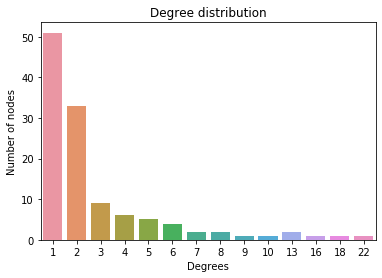

In [11]:
draw_degree_distribution(G)

<h1>Które węzły są ważne?</h1>
<br>
Po zapoznaniu się z bazowymi metrykami, ważnym krokiem jest określenie ważnych węzłów w sieci. Miarę tą nazywamy centralnością. Istnieją różne podejścia oraz 4 najbardziej popularne miary:<br>
- stopień grafu<br>
- degree centrality<br>
- betweenness centrality<br>
- eigenvector centrality<br>

Networkx udostępnia kilka wbudowanych metod zbadania centralności, wszystkie zwracają słowniki (kluczami są węzły, wartościami pomiary centralności).

https://networkx.github.io/documentation/stable/reference/algorithms/centrality.html

In [47]:
# function plotting graph centrality
def plot_graph_centrality(centrality_values, title):
    plt.figure(figsize=(12, 9))
    plt.title(title, size=12)
    pos=graphviz_layout(G,  prog="neato")

    cmap = plt.get_cmap('inferno')
    vmin = min(centrality_values)
    vmax = max(centrality_values)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm.set_array([])
    cbar = plt.colorbar(sm)
    
    node_sizes = [d*3000 for d in centrality_values]

    nx.draw(G, cmap = cmap, node_color = centrality_values, node_size=node_sizes, pos=pos, alpha=0.8, edge_color='lightgray')

In [13]:
# function getting most important nodes
def get_most_important_nodes(nodes_dict):
    # wyczyścic ?
    sorted_centrality = sorted(nodes_dict.items(), key=itemgetter(1), reverse=True)
    
    for tb in sorted_centrality[:5]:
        print("Name:", tb[0], "| Centrality:", tb[1])
        
    return sorted_centrality

<h2> Degree centrality </h2>
<br>
- określa z jaką częscią węzłów istnieją połączenia<br>
- węzły z największym stopniem nazywamy hubami<br>
<br>
Zadanie: Znaleźć i zwizualizować najważniejsze węzły wg tej miary (pomocnicza funkcja rysująca graf: plot_graph_centrality)

In [14]:
degree_centrality = nx.degree_centrality(G)

degree_centrality_values = list(degree_centrality.values())

In [15]:
# TODO find most important nodes according to degree centrality
print("Top 5 nodes by degree centrality:")

degree_sorted = get_most_important_nodes(degree_centrality)

Top 5 nodes by degree centrality:
Name: George Fox | Centrality: 0.1864406779661017
Name: William Penn | Centrality: 0.15254237288135594
Name: James Nayler | Centrality: 0.13559322033898305
Name: George Whitehead | Centrality: 0.11016949152542373
Name: Margaret Fell | Centrality: 0.11016949152542373


[0.00847457627118644, 0.00847457627118644, 0.03389830508474576, 0.00847457627118644, 0.00847457627118644, 0.00847457627118644, 0.01694915254237288, 0.025423728813559324, 0.05084745762711865, 0.01694915254237288, 0.025423728813559324, 0.00847457627118644, 0.00847457627118644, 0.00847457627118644, 0.00847457627118644, 0.1864406779661017, 0.0423728813559322, 0.01694915254237288, 0.03389830508474576, 0.025423728813559324, 0.00847457627118644, 0.00847457627118644, 0.01694915254237288, 0.00847457627118644, 0.01694915254237288, 0.025423728813559324, 0.01694915254237288, 0.01694915254237288, 0.00847457627118644, 0.00847457627118644, 0.01694915254237288, 0.00847457627118644, 0.03389830508474576, 0.01694915254237288, 0.00847457627118644, 0.01694915254237288, 0.13559322033898305, 0.00847457627118644, 0.11016949152542373, 0.00847457627118644, 0.01694915254237288, 0.0847457627118644, 0.00847457627118644, 0.01694915254237288, 0.00847457627118644, 0.01694915254237288, 0.01694915254237288, 0.050847457

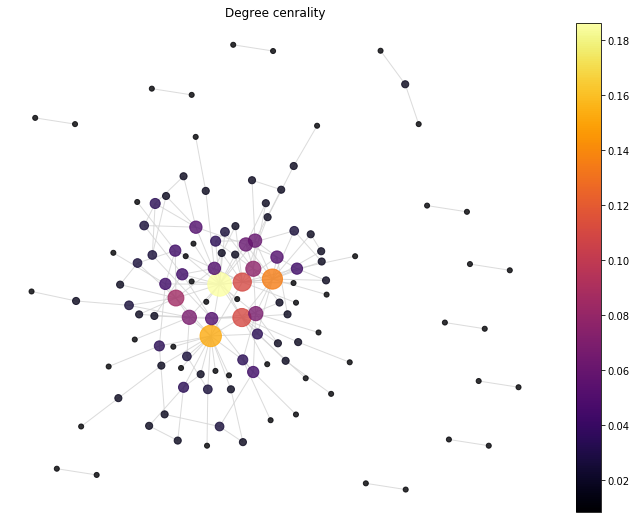

In [37]:
# TODO plot important nodes accoring to degree centrality

plot_graph_centrality(degree_centrality_values, 'Degree cenrality')

<h2> Betweenness centrality </h2>
<br>
- nie uwzględnia ilości krawędzi wychodzących z węzła<br>
- miara najkrótszej ścieżki pomiędzy węzłami<br>
- liczymy wszsytkie możliwe najkrótsze ścieżki w grafie <br>
- zakres wartości 0 - 1<br>
- możliwość znalezienia węzłów łączących krańce sieci, węzły stanowiące jedyne połączenie dwóch klastrów nazywamy "brokerami".<br>

Zadanie: Znaleźć i zwizualizować najważniejsze węzły wg tej miary (pomocnicza funkcja rysująca graf: plot_graph_centrality)

In [17]:
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality

betweenness_values = list(betweenness_dict.values())

In [18]:
# TODO find most important nodes according to betweenness centrality

betweenness_sorted = get_most_important_nodes(betweenness_dict)

Name: William Penn | Centrality: 0.23999456006192205
Name: George Fox | Centrality: 0.23683257726065216
Name: George Whitehead | Centrality: 0.12632024847366005
Name: Margaret Fell | Centrality: 0.12106792237170329
Name: James Nayler | Centrality: 0.10446026280446098


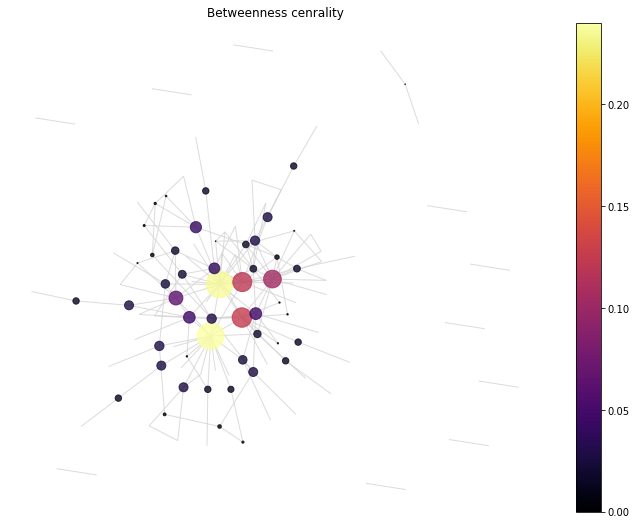

In [19]:
# TODO plot important nodes accoring to betweenness centrality

plot_graph_centrality(betweenness_values, 'Betweenness cenrality')

<h2> Eigenvector centrality </h2>
<br>
- rozszerzenie pomiarów stopnia
<br>
- bierzemy pod uwagę kombinację krawędzi węzła i krawędzi jego sąsiadów, tzn. nie tylko sprawdzamy czy węzeł jest hubem ale też z iloma hubami jest połączony. <br>
- zakres 0 - 1, im większa wartość tym większa centralność <br>
- pozwalają określić które węzły sprawdzą się najlepiej w szybkim przekazywaniu informacji dalej. <br>

Zadanie: Znaleźć i zwizualizować najważniejsze węzły wg tej miary (pomocnicza funkcja rysująca graf: plot_graph_centrality)

In [20]:
eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality

eigenvector_values = list(eigenvector_dict.values())

In [21]:
# TODO find most important nodes according to eigenvector centrality

eigenvector_sorted = get_most_important_nodes(eigenvector_dict)

Name: George Fox | Centrality: 0.4491750710859924
Name: James Nayler | Centrality: 0.3352974100447867
Name: William Penn | Centrality: 0.2703220115399868
Name: Margaret Fell | Centrality: 0.253170949905681
Name: George Whitehead | Centrality: 0.2497455334914196


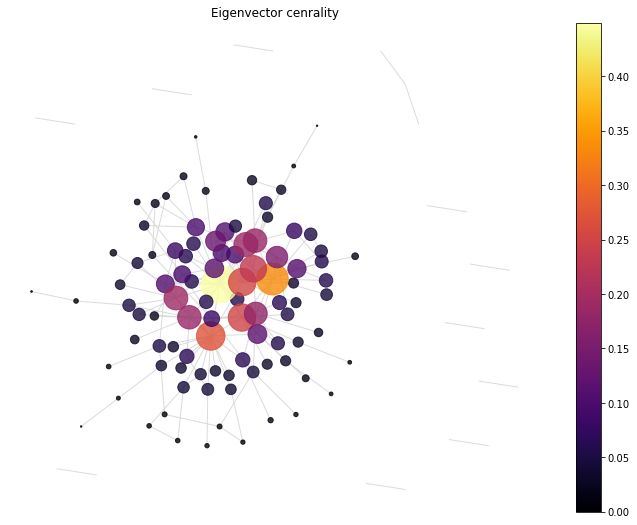

In [22]:
# TODO plot important nodes accoring to eigenvector centrality

plot_graph_centrality(eigenvector_values, 'Eigenvector cenrality')

<h3> Ktore węzły są istotne według jednej miary centralności, mniej ważne według innej </h3>

Zadanie: Porównanie różnych miar centralności, czemu niektóre węzły są ważne według jednej metryki, mniej ważne według innej?

In [23]:
degree_dict = dict(G.degree(G.nodes()))

for tb in betweenness_sorted[:20]: 
    degree = degree_dict[tb[0]] 
    eigenvector = eigenvector_dict[tb[0]]
    print("Name:", tb[0], "| Betweenness:", tb[1], "| Degree:", degree)

Name: William Penn | Betweenness: 0.23999456006192205 | Degree: 18
Name: George Fox | Betweenness: 0.23683257726065216 | Degree: 22
Name: George Whitehead | Betweenness: 0.12632024847366005 | Degree: 13
Name: Margaret Fell | Betweenness: 0.12106792237170329 | Degree: 13
Name: James Nayler | Betweenness: 0.10446026280446098 | Degree: 16
Name: Benjamin Furly | Betweenness: 0.06419626175167242 | Degree: 10
Name: Thomas Ellwood | Betweenness: 0.046190623885104545 | Degree: 8
Name: George Keith | Betweenness: 0.045006564009171565 | Degree: 8
Name: John Audland | Betweenness: 0.04164936340077581 | Degree: 6
Name: Alexander Parker | Betweenness: 0.03893676140525336 | Degree: 6
Name: John Story | Betweenness: 0.028990098622866983 | Degree: 6
Name: John Burnyeat | Betweenness: 0.028974117533439564 | Degree: 4
Name: John Perrot | Betweenness: 0.02829566854990583 | Degree: 7
Name: James Logan | Betweenness: 0.026944806605823553 | Degree: 4
Name: Richard Claridge | Betweenness: 0.02694480660582355

# Zadanie 3 Obliczanie średnicy grafu

## Średnica grafu spójnego to odległość na jaką są oddalone dwa najodleglejsze wierzchołki grafu, czyli najmniejsza taka liczba n, że dowolne dwa wierzchołki łączy ścieżka długości co najwyżej n.
### Uzupełnij funkcję `compute_diameter`, tak aby poprawnie obliczała średnicę grafu
#### UWAGA - funkcja nx.diameter() działa poprawnie tylko dla grafu spójnego

In [29]:
def compute_diameter(G):
    #Get largest connected component
    components = nx.connected_components(G)
    largest_component = max(components, key=len)
    
    #Create subgraph
    subgraph = G.subgraph(largest_component)
    
    #Compute diameter
    diameter = nx.diameter(subgraph)
    
    return diameter
    

In [30]:
print("Graph diameter: {}".format(compute_diameter(G)))

Graph diameter: 8


# Zadanie 4 Community detection


#### Modułowość opisuje strukturę grafu i jego podział na mniejsze społeczności. Grafy z dużą modułowością posiadają dużo połączeń wewnątrz społeczności ale mało między społecznościami


### Modułowość: https://en.wikipedia.org/wiki/Modularity_(networks)


### Biblioteka SNAP posiada 2 algorytmy wyznaczania społeczności



## Algorytm Clauset-Newman-Moore

Ideą tego algorytmu jest sukcesywne łączenie ze sobą społeczności, zaczynając od pojedynczych wierzchołków, które najbardziej zwiększają miarę modułowości.

### Dokumentacja SNAP https://snap.stanford.edu/snappy/doc/reference/CommunityCNM.html




## Algorytm Grivan-Newmanm
### https://en.wikipedia.org/wiki/Girvan–Newman_algorithm

Ideą tego algorytmu jest sukcesywne znajdywanie krawędzi które podejrzewamy o stanowienie połączeń między społecznościami. Aby znaleźć te krawędzie używamy miary betweenness centrality ale używamy jej dla krawędzi a nie wierzchołków - czyli ile najkrótszych ścieżek przechodzi przez każdą krawędź. Algorytm składa się z następujących kroków:

1. Obliczanie miary "betweenness" dla wszystkich krawędzi.
2. Krawędź z najwyższą wartością tej miary jest usuwana.
3. Krawędzie dla których miara ulegnie zmianie są przeliczane ponownie.
4. Powtarzane są kroki 2 i 3 aż nie pozostania żadna krawędź

Z tak powstałego rozkładu grafu wybierany jest taki podział aby miara modułowości była największa


### Dokumentacja SNAP https://snap.stanford.edu/snappy/doc/reference/CommunityGirvanNewman.html

In [48]:
import snap
import numpy as np
from pprint import pprint as pp


names = G.nodes()
nameToId = dict(zip(names, range(len(names))))
idToName = dict([(value, key) for key, value in nameToId.items()]) 

edgeListNumber = edgeList.replace(nameToId)
path = "edgelistfile.txt"
pp(edgeListNumber.to_csv(path_or_buf = path, sep=" ", header=False, index=False))

Graph = snap.LoadEdgeList(snap.PUNGraph, path, 0, 1)

# function plotting graph comunity
def plot_graph_comunity(communities, title):
    plt.figure(figsize=(12, 9))
    plt.title(title, size=12)
    pos=graphviz_layout(G,  prog="neato")

    cmap = plt.get_cmap('jet')
    vmin = min(communities)
    vmax = max(communities)
    
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm.set_array([])
    cbar = plt.colorbar(sm)
    
    nx.draw(G, cmap = cmap, node_color = communities, pos=pos, alpha=0.8, edge_color='lightgray')

None


## TODO: Narysuj wizualizacje metod Clauset-Newman-Moore i Grivan-Newmanm na danych Quackers.

### Użyj funkcji plot_graph_comunity przyjmującej argument communities, listę opisującą społeczność wszystkich wierzchołków - tj numer społeczności i-tego wierzchołka opisuje  communities[i]

### Użyj obiektu Graph jako danych wyjściowych, są to te same dane co w poprzednich zadaniach, wczytane do formatu SNAPa

### Porównaj wartości modularity obu metod

CommunityGirvanNewman


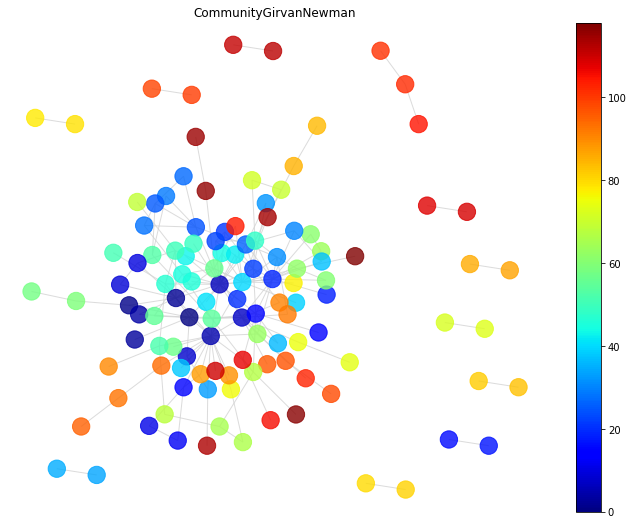

In [51]:
#### DO USUNIĘCIa 
CmtyV = snap.TCnComV()
#comunity cnn
modularity = snap.CommunityCNM(Graph, CmtyV)


for i, Cmty in enumerate(CmtyV):
#     print("Community: ", i)
    for NI in Cmty:
        communities[NI] = i
        
#CommunityGirvanNewman 
print("CommunityGirvanNewman")
# print(G.nodes)
modularity = snap.CommunityGirvanNewman(Graph, CmtyV)
# pp(modularity)

plot_graph_comunity(communities, "CommunityGirvanNewman")

for Cmty in CmtyV:
#     print("Community: ")
    for NI in Cmty:
        print("       " + idToName[NI])

#### THIS IS TURORIAL RESULT